# Zomato Data Analysis

### Step1 : Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step2: Creating Data frame

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Step3 : Data Preprocessing

#### Convert the Data types of column: Rate

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)

In [6]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Answering Questions

#### What type of Restaurant do the majority of customers order from ?

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

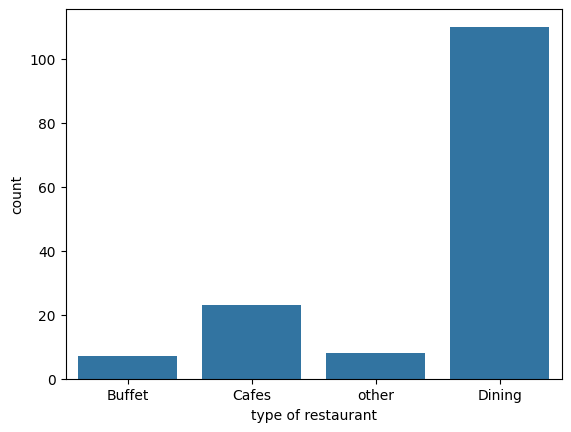

In [11]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

##### conclusion - majority fo the restaurant falls in dining category

#### How many votes has each type of restaurant recieved from customer?

Text(0, 0.5, 'Votes')

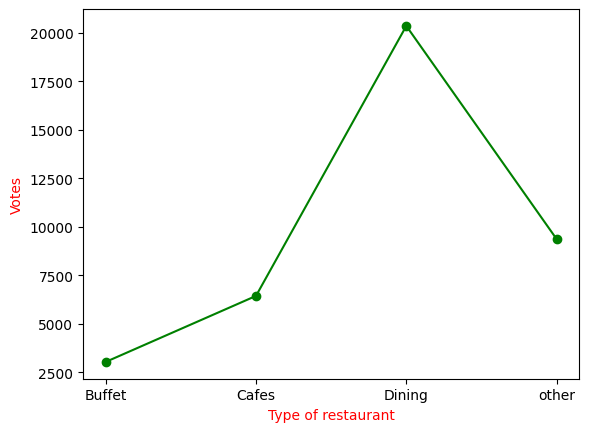

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green", marker="o")
plt.xlabel("Type of restaurant",c="red", size=10)
plt.ylabel("Votes", c="red", size=10)

##### conclusion: dinning restaurants has received maximum votes

#### What are the ratings that the majority of restaurants have received?

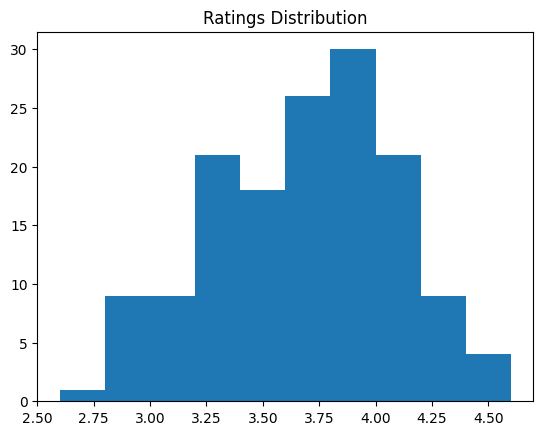

In [15]:
plt.hist(dataframe['rate'],bins=10)
plt.title("Ratings Distribution")
plt.show()

##### Conclusion: majoirity ratings are from 3.5 to 4.2

#### Zomato has observed that most couples order most of their food online. What is the average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

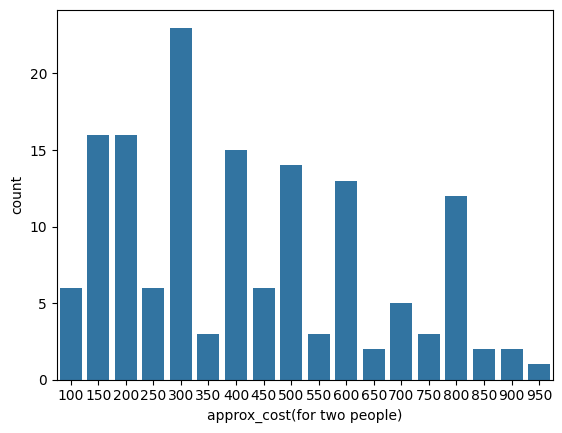

In [16]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

##### conclusion: Maximum spend amount is 300rs

#### Which mode has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

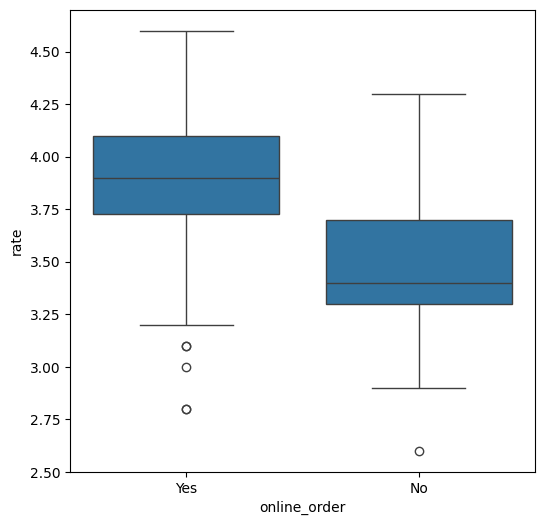

In [17]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data = dataframe)

##### Conclusion - offline order received lower rating in comparison to online

#### Which type of restaurant received more offline orders, so that zomato can provide customers with some good offers?

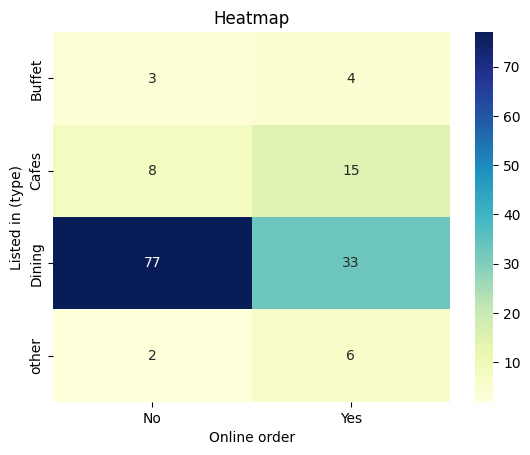

In [19]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed in (type)")
plt.show()

#### Conclusion: Dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders.This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.